<a href="https://colab.research.google.com/github/jmbanda/CSC4850-Machine-Learning/blob/main/ML_example3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalization and Overfitting - Example code - part 3

In machine learning, learning refers to an optimization process where the parameters of the model update themselves using a loss function at every iteration of the training, such that the equation fits the distribution perfectly or approximately. See the image below. 

Conceptually, capacity represents the number of functions (linear or nonlinear) that a machine learning algorithm can select as an optimal solution. The performance of the machine learning algorithm depends on its capacity. A good rule of thumb is that the capacity of the model should be proportional to the complexity of its task and the input of the training data set. 

Machine learning models with low capacity are more than useless when it comes to solving complex tasks. They tend to underfit. Likewise, models with higher capacity (than needed) are most likely to overfit. 

Essentially, model capacity represents a measure by which we can estimate whether the model is prone to underfit or overfit.

Let’s understand this with some code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we’ll create a dataset. Then, we’ll define a **true function**. A **true function** in supervised learning is a function that has already mapped the input to the output. This will help us evaluate how correctly our machine learning algorithm models the distribution. Lastly, we’ll define a y, which is an output of the true function

In [29]:
np.random.seed(1234)

X = np.sort(np.random.rand(100))
true_f = lambda X: np.cos(3.5 * np.pi * X)
y = true_f(X) + np.random.randn(100) * 0.1

Now we plot our sample points and the fit with the true function.

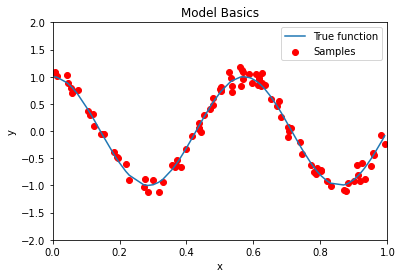

In [30]:
plt.plot(X, true_f(X), label="True function")
plt.scatter(X, y, label="Samples", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Model Basics")
plt.show()

Let's get working on building a model. In this loop, we’ll iterate the model with four different degrees, 1, 5, 10, 15. This will show us how capacity can help us achieve a good model that can yield good results. 

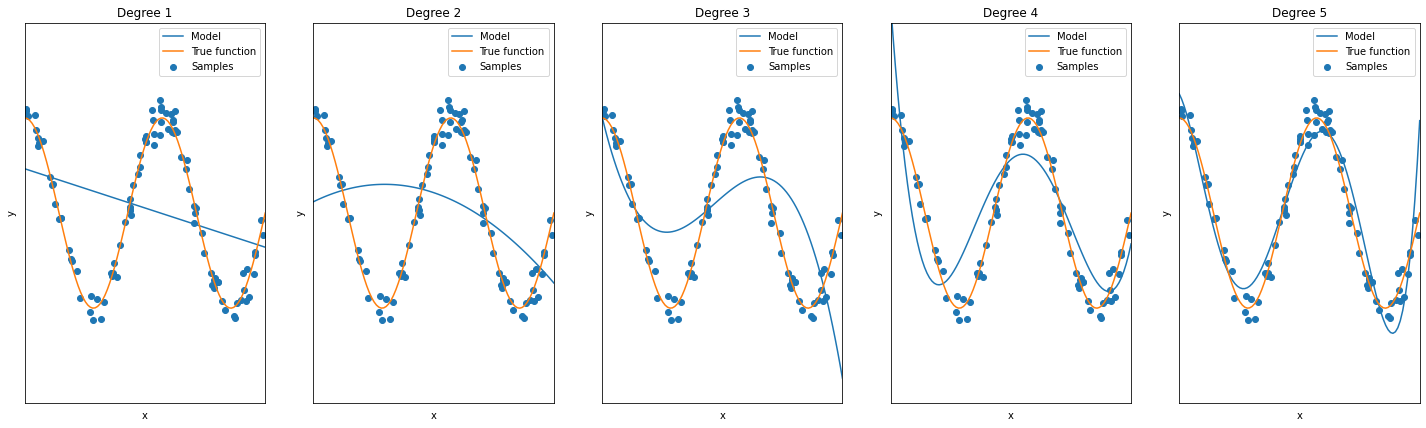

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1,2,3,4,5]

plt.figure(figsize=(25, 7))
for i in range(len(degrees)):
   ax = plt.subplot(1, len(degrees), i+1)
   plt.setp(ax, xticks=(), yticks=())

   polynomial_features = PolynomialFeatures(degree=degrees[i],
                                               include_bias=False)
   linear_regression = LinearRegression()

   #creating a structure for operation
   pipeline = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", linear_regression)])

   pipeline.fit(X[:, np.newaxis], y)

   #Testing
   X_test = np.linspace(0, 1, 100)
   yhat = pipeline.predict(X_test[:, np.newaxis])
   plt.plot(X_test, yhat,label="Model")
   plt.plot(X_test, true_f(X_test), label="True function")
   plt.scatter(X, y, label="Samples")
   plt.xlabel("x")
   plt.ylabel("y")
   plt.xlim((0, 1))
   plt.ylim((-2, 2))
   plt.legend(loc="best")
   plt.title("Degree %d" % degrees[i])
plt.show()

The fifth degree polinomial is looking almost like a perfect fit. What happens when we go all the way to 10 degrees

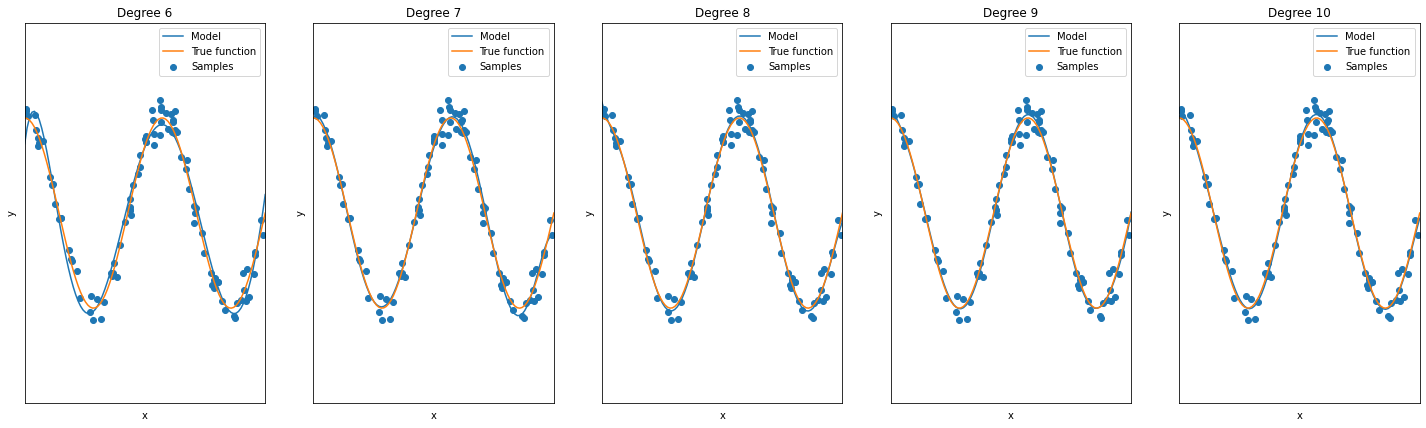

In [32]:
degrees = [6,7,8,9,10]

plt.figure(figsize=(25, 7))
for i in range(len(degrees)):
   ax = plt.subplot(1, len(degrees), i+1)
   plt.setp(ax, xticks=(), yticks=())

   polynomial_features = PolynomialFeatures(degree=degrees[i],
                                               include_bias=False)
   linear_regression = LinearRegression()

   #creating a structure for operation
   pipeline = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", linear_regression)])

   pipeline.fit(X[:, np.newaxis], y)

   #Testing
   X_test = np.linspace(0, 1, 100)
   yhat = pipeline.predict(X_test[:, np.newaxis])
   plt.plot(X_test, yhat,label="Model")
   plt.plot(X_test, true_f(X_test), label="True function")
   plt.scatter(X, y, label="Samples")
   plt.xlabel("x")
   plt.ylabel("y")
   plt.xlim((0, 1))
   plt.ylim((-2, 2))
   plt.legend(loc="best")
   plt.title("Degree %d" % degrees[i])
plt.show()

From the images above we see that capacity plays an important role in building a good machine learning model. The first image on the left underfits, while gradually the images on the right (and the second loop) fit better over the distribution. 

Keep in mind that if the capacity of the model is higher than the complexity of the data, then the model can overfit. Let's see below:

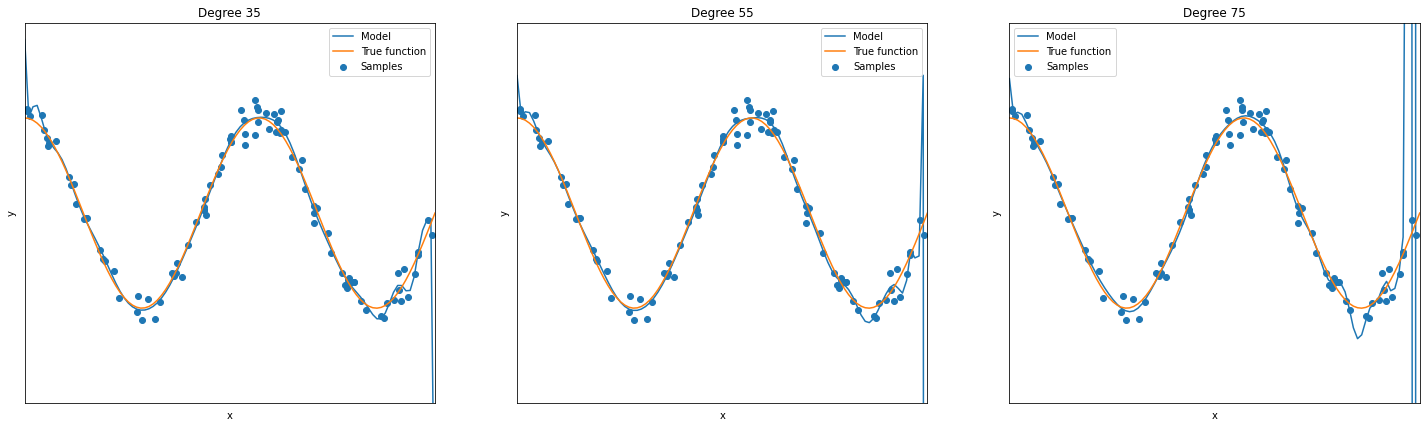

In [33]:
degrees = [35,55,75]

plt.figure(figsize=(25, 7))
for i in range(len(degrees)):
   ax = plt.subplot(1, len(degrees), i+1)
   plt.setp(ax, xticks=(), yticks=())

   polynomial_features = PolynomialFeatures(degree=degrees[i],
                                               include_bias=False)
   linear_regression = LinearRegression()

   #creating a structure for operation
   pipeline = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", linear_regression)])

   pipeline.fit(X[:, np.newaxis], y)

   #Testing
   X_test = np.linspace(0, 1, 100)
   yhat = pipeline.predict(X_test[:, np.newaxis])
   plt.plot(X_test, yhat,label="Model")
   plt.plot(X_test, true_f(X_test), label="True function")
   plt.scatter(X, y, label="Samples")
   plt.xlabel("x")
   plt.ylabel("y")
   plt.xlim((0, 1))
   plt.ylim((-2, 2))
   plt.legend(loc="best")
   plt.title("Degree %d" % degrees[i])
plt.show()

## Variance and bias

Variance and bias are some of those concepts that most of us forget to consider. What do they mean?

**Bias** usually refers to the rigidity of the model. Consider a dataset with a nonlinear property (something that we saw in the beginning). In order to capture the pattern, we need to apply a machine learning algorithm that’s flexible enough to capture a nonlinear property. If we apply a linear equation, then we say that the machine learning model has high bias and low variance. In simple words, high-biased models are rigid to capture the complex nature of the data.

Let’s define a nonlinear function that captures the true features or representation of the data, and a simple linear model. 

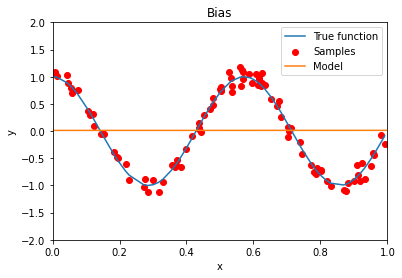

In [48]:
Simple_Model = 2*(X)

plt.plot(X, true_f(X), label="True function")
plt.scatter(X, y, label="Samples", c="r")
plt.plot(Simple_Model, label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Bias")
plt.show()

As you can see from the image above, the simple model is:

1.  Too rigid, too simple to capture nonlinear representation.
2.  High bias and low variance.
3.  Producing high error on training set – underfitting.

**Variance**, on the other hand, is when the algorithm during training tries to model the distribution so precisely that it captures the position of each and every data-point. As a result, the model is too flexible and too complex. In such cases, the model has high variance and low bias. 

Text(0.5, 1.0, 'Variance')

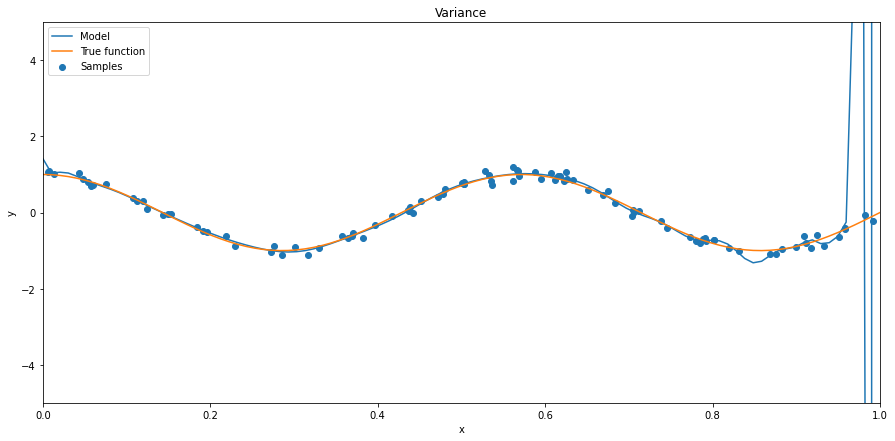

In [49]:
plt.figure(figsize=(15, 7))
polynomial_features = PolynomialFeatures(degree=75,
                                            include_bias=False)
linear_regression = LinearRegression()

#creating a structure for operation
pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])

pipeline.fit(X[:, np.newaxis], y)

#Testing
X_test = np.linspace(0, 1, 100)
yhat = pipeline.predict(X_test[:, np.newaxis])
plt.plot(X_test, yhat,label="Model")
plt.plot(X_test, true_f(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-5, 5))
plt.legend(loc="best")
plt.title("Variance")

As you can see from the image above, the complex model has:

1.  Tendency to capture noise from the dataset.
2.  High variance and low bias.
3.  High error on the test set – overfitting.

# How to overcome overfitting and underfitting in your ML model?

We’ll discuss four ways to avoid overfitting and underfitting:

1.  Introduce a validation set
2.  Variance-bias tradeoff
3.  Cross-validation
4.  Hyperparameter tuning

## Validation set

Validation dataset is used to provide an unbiased evaluation after training the model on the training dataset. It’s helpful during the design iteration of the architecture, or hyperparameter tuning of the model. In both situations it improves model performance before it’s deployed, and makes sure that the model generalizes well on testing data. 

It’s important to remember that training and validation data is used during the training to check overfitting and underfitting. Test data is used to make sure that the model is generalizing well. 

A good practice is to create a training set and testing set from the entire data, followed by creating a training set and validation set from the earlier separated training set. 


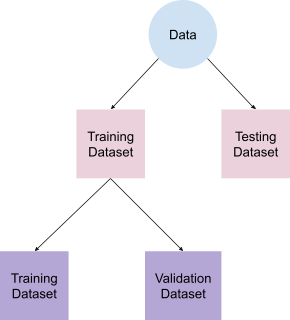

## Variance-bias tradeoff

We already know what variance and bias are. They can play an important role for building a good machine learning model, or even a deep learning model that yields good results. Essentially, we can’t have both variance and bias in extremely high quantities. We have both in limited quantities. 

*“One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error” – (Hands-On Machine Learning with Scikit-Learn and TensorFlow,  Aurélien Géron; 2019)*

Variance-bias tradeoff is basically finding a sweet spot between bias and variance. We know that bias is a reflection of the model’s rigidity towards the data, whereas variance is the reflection of the complexity of the data. High bias results in a rigid model. As we increase the capacity, the model tends to increase its flexibility by reducing the rigidity. Essentially, we’re transforming an underfitted model towards a statistically good fit model by increasing the capacity. 

A good practice is to check the training error and validation error. Because error = bias + variance. If both errors are less and close to each other, then the model has a good fit.  

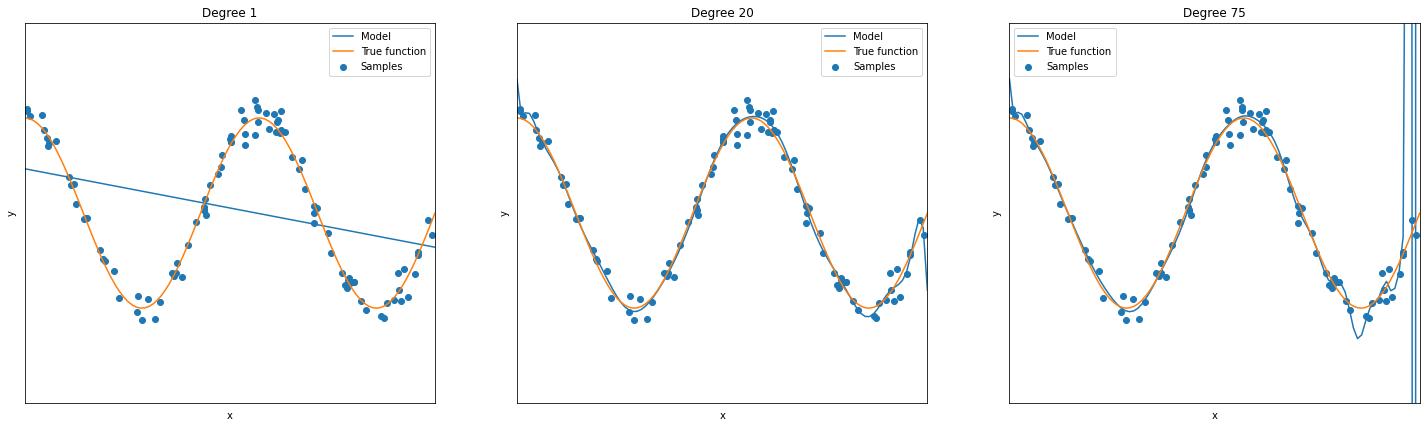

In [51]:
degrees = [1,20,75]

plt.figure(figsize=(25, 7))
for i in range(len(degrees)):
   ax = plt.subplot(1, len(degrees), i+1)
   plt.setp(ax, xticks=(), yticks=())

   polynomial_features = PolynomialFeatures(degree=degrees[i],
                                               include_bias=False)
   linear_regression = LinearRegression()

   #creating a structure for operation
   pipeline = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", linear_regression)])

   pipeline.fit(X[:, np.newaxis], y)

   #Testing
   X_test = np.linspace(0, 1, 100)
   yhat = pipeline.predict(X_test[:, np.newaxis])
   plt.plot(X_test, yhat,label="Model")
   plt.plot(X_test, true_f(X_test), label="True function")
   plt.scatter(X, y, label="Samples")
   plt.xlabel("x")
   plt.ylabel("y")
   plt.xlim((0, 1))
   plt.ylim((-2, 2))
   plt.legend(loc="best")
   plt.title("Degree %d" % degrees[i])
plt.show()

The image on the left shows high bias and underfitting, center image shows a good fit model, image on the right shows high variance and overfitting. 

## Cross-validation

Cross-validation helps us avoid overfitting by evaluating ML models on various validation datasets during training. It’s done by dividing the training data into subsets. So how does cross validation help a model?

Well, we want the model to learn the important features and patterns during the training. Cross-validation splits the data such that the validation data is representative of both training and the data from the real-world scenario. This helps the model generalize well and yield good results.

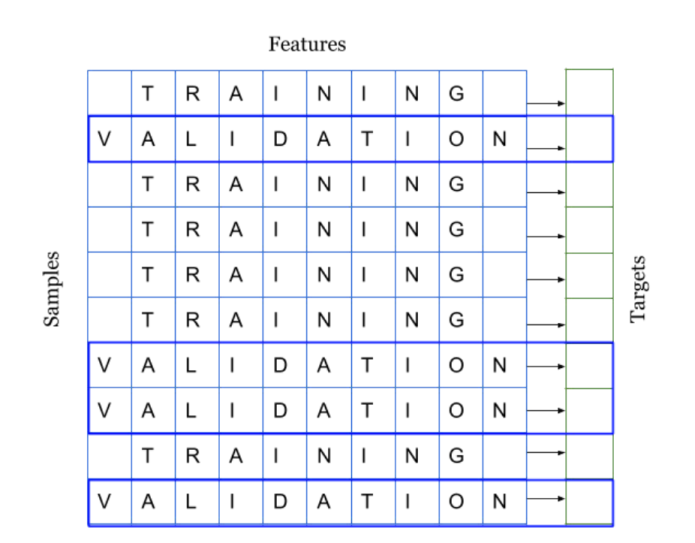

Source: Approaching (Almost) Any Machine Learning Problem (2020), Abhishek Thakur

Let’s see an example. 

Firstly, we’ll build four decision trees. Each decision will have different max-depth. Next, we’ll train them:

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#### Let's make some data

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1500, centers=10,
                  random_state=1234, cluster_std=0.5)

#### Let's create a test and a train set
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=1234, test_size=0.25, shuffle=True)

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)

tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg4 = DecisionTreeRegressor(random_state=42, max_depth=12)
tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)
tree_reg3.fit(X_train, y_train)
tree_reg4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, random_state=42)

We will now compare the performance of the four models on both the train and the test sets.

In [71]:
print(" The training and testing scores of model 1 - depth 2:" + str(tree_reg1.score(X_train, y_train)) + " and " + str(tree_reg1.score(X_test, y_test)))
print(" The training and testing scores of model 2 - depth 3:" + str(tree_reg2.score(X_train, y_train)) + " and " + str(tree_reg2.score(X_test, y_test)))
print(" The training and testing scores of model 3 - depth 5:" + str(tree_reg3.score(X_train, y_train)) + " and " + str(tree_reg3.score(X_test, y_test)))
print(" The training and testing scores of model 4 - depth 12:" + str(tree_reg4.score(X_train, y_train)) + " and " + str(tree_reg4.score(X_test, y_test)))

 The training and testing scores of model 1 - depth 2:0.4175984648078914 and 0.4189681555599051
 The training and testing scores of model 2 - depth 3:0.533736067198135 and 0.5326330606793825
 The training and testing scores of model 3 - depth 5:0.9155686106318259 and 0.8963299594440509
 The training and testing scores of model 4 - depth 12:0.9971077276522534 and 0.9786528788588942


Two things we can observe:

1.  As the max depth increases, the training accuracy increases.
2.  As the max depth increases, the difference between the training and the testing accuracy also increases – overfitting. 

In order to fix that, we will use k-fold cross validation to create subsets from the training set. k-fold cross-validation splits the dataset into ‘k’ number of folds, then uses one of the ‘k’ folds as a validation set, and the other k-1 folds as a training set. 

This process is repeated k times, such that each of the k folds is used once as the test set. The scores obtained from this k times training and testing are then averaged to obtain the final score. 

In [74]:
from sklearn.model_selection import KFold 
fold = KFold(n_splits=5, random_state=1234, shuffle=True)

for index, (train, test) in enumerate(fold.split(X_train,y_train)):
   X_train_folds = X_train[train]
   y_train_folds = y_train[train]

   X_test_folds = X_train[test]
   y_test_folds = y_train[test]

   tree_reg1.fit(X_train_folds, y_train_folds)
   tree_reg2.fit(X_train_folds, y_train_folds)
   tree_reg3.fit(X_train_folds, y_train_folds)
   tree_reg4.fit(X_train_folds, y_train_folds)
   print(" FOLD - " + str(index))
   print(" The training and testing scores of model 1 - depth 2:" + str(tree_reg1.score(X_train, y_train)) + " and " + str(tree_reg1.score(X_test, y_test)))
   print(" The training and testing scores of model 2 - depth 3:" + str(tree_reg2.score(X_train, y_train)) + " and " + str(tree_reg2.score(X_test, y_test)))
   print(" The training and testing scores of model 3 - depth 5:" + str(tree_reg3.score(X_train, y_train)) + " and " + str(tree_reg3.score(X_test, y_test)))
   print(" The training and testing scores of model 4 - depth 12:" + str(tree_reg4.score(X_train, y_train)) + " and " + str(tree_reg4.score(X_test, y_test)))

 FOLD - 0
 The training and testing scores of model 1 - depth 2:0.41755335136896543 and 0.4190989537770744
 The training and testing scores of model 2 - depth 3:0.5189800917043104 and 0.49005100866408025
 The training and testing scores of model 3 - depth 5:0.9384132689768936 and 0.9149167861902703
 The training and testing scores of model 4 - depth 12:0.9919199040195382 and 0.976663480755174
 FOLD - 1
 The training and testing scores of model 1 - depth 2:0.41756622521305475 and 0.41860349043950995
 The training and testing scores of model 2 - depth 3:0.5310264345188326 and 0.5246892203479074
 The training and testing scores of model 3 - depth 5:0.9127698096426669 and 0.8877143214415535
 The training and testing scores of model 4 - depth 12:0.9922622265694366 and 0.9633413630263422
 FOLD - 2
 The training and testing scores of model 1 - depth 2:0.4129549115999388 and 0.4188910190795251
 The training and testing scores of model 2 - depth 3:0.5348374158730164 and 0.5326163737645138
 The 

As we can see, overfitting is reduced to some extent. So far, so good. 

But, we have to keep in mind that cross-validation is purely based on how we make a good subset for the training and evaluation phase. It gives us a starting point, but we have to learn other methods to optimize our model as well. 

Let’s discover other methods to further reduce overfitting, while increasing model performance.

## Hyperparameter tuning

When creating a (good) ML or DL model, you’ll have to carefully decide and choose what architecture will work best for your application – in this case, the data distribution. Of course, it will mostly be a trial and error method, unless we find the best architecture of our algorithm that can model the distribution accurately. For that, we need to explore a range of possibilities.

Looking for the optimal model architecture, we can ask the machine learning algorithm to perform a search to give us a good combination of parameters or architecture for our data distribution. Furthermore, parameters that define the model architecture are referred to as hyperparameters, and the process of searching those parameters is referred to as hyperparameter tuning.

Some of the questions that you might ask while designing a model are:


1.  What should be the degree of polynomial features for the linear model?
2.  What should be the maximum depth allowed for the decision tree or random forest?
3.  How many trees should I include in my random forest?
4.  What should be the learning rate for gradient descent? 

In this example, we’ll see how we can use grid-search to find the best parameter for our random forest algorithm to reduce overfitting:

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
   """ Calculates and returns the performance score between
       true and predicted values based on the metric chosen. """

   score = r2_score(y_true,y_predict)

   return score

In order to do a grid search, we need to make sure that we define all the parameters (that we want to change) in a dictionary:

In [81]:
params = {'max_depth':np.arange(1,11),
         'n_estimators' : [10, 50, 100, 200],
         'oob_score' : [False, True],
         'max_features': ['auto', 'sqrt']}

In [82]:
scoring_fnc = make_scorer(performance_metric)
regressor_tree = RandomForestRegressor(random_state=42, n_jobs = -1)
grid = GridSearchCV(estimator=regressor_tree,param_grid=params,cv=5,scoring=scoring_fnc)

In [84]:
### NOTE: This is added to ignore all warnings from sklearn ###
import warnings
warnings.filterwarnings('ignore') 

grid.fit(X_train, y_train)
grid.score(X_train, y_train), grid.score(X_test, y_test)

(0.9941963820551389, 0.9926264485883606)

As you can see, that grid search helps you find parameters that can reduce overfitting by a significant amount. 

To know what combination of parameters or architecture grid-search found for the data distribution, just run `grid.best_estimator_`

Sources:

https://neptune.ai/blog/overfitting-vs-underfitting-in-machine-learning 